# **Project Work**


**Equipe**:

**Kelvin Leandro Martins - 540006**

**Pedro Leinos Falcão Cunha - 542114**

## Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import symbols, limit, solve, latex
from scipy import signal
from IPython.display import display, Math

!pip install control
import control as ctrl

## **Task 2 - System Analysis**

The objective of the second task of the project
work is to analyse the dynamic two-tank system developed in the first task

### 1.

Considering the transfer function that describes the input-output system, plot the response of the system of a step input of amplitude A, defined based on your system

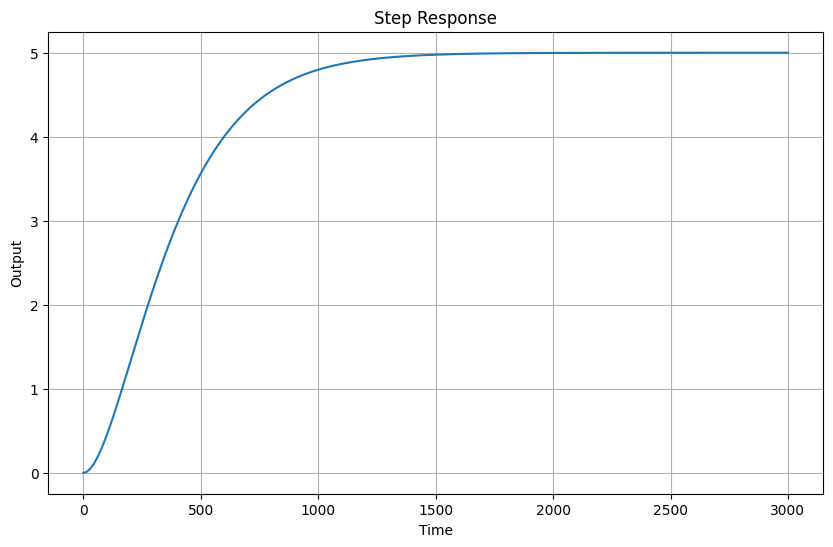

In [ ]:
# previous project work code / result
A = np.array([[-1/200,  0.], [1/200, -1/200]])
B = np.array([[1/20, 0.], [0., 1/20]])
C = np.array([[0., 1.]])
D = np.array([[0., 0.]])

x0 = np.array([0., 0.]) # Initial conditions
x_eq = np.array([5., 5.]) # equilibrium state

# state-space system
ss = signal.StateSpace(A, B, C, D)

# step response
t = np.linspace(0, 3000, 10000)
_, y_linear, x_linear = signal.lsim(ss, U=0, T=t, X0 = x0 - x_eq)

plt.figure(figsize=(10, 6))
plt.plot(t, y_linear + x_eq[1])
plt.title('Step Response')
plt.xlabel('Time')
plt.ylabel('Output')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the transfer function H(s) = C*(sI - A)^(-1)*B + D
s = sp.Symbol('s')
I = sp.eye(A.shape[0])  # Identity matrix
H_s = C * (s * I - A).inv() * B + D

# Simplify the transfer function
H_s = sp.simplify(H_s)

# Display the transfer function vector
H_s_latex = sp.latex(H_s[0])
display(Math(f'H(s) = {H_s_latex}'))

<IPython.core.display.Math object>

In [ ]:
H_s

Matrix([[0.00025/(1.0*s**2 + 0.01*s + 2.5e-5), 0.05/(1.0*s + 0.005)]])

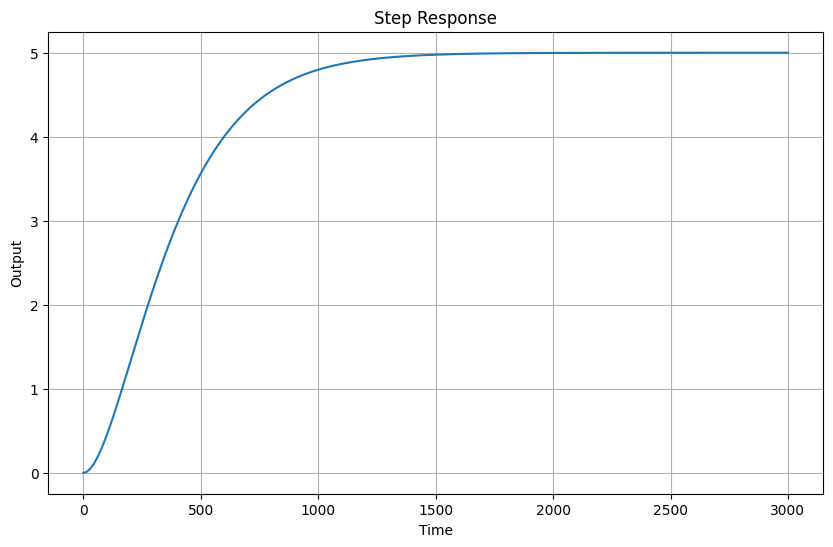

In [ ]:
# Extract the numerator and denominator
num = [0.00025]
den = [1, 0.01, 2.5e-5]

tf = ctrl.TransferFunction(num, den)
t = np.linspace(0, 3000, 10000)
t, y = ctrl.step_response(tf, T=t)
y *= 0.5 # step of amplitude 0.5

plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.title('Step Response')
plt.xlabel('Time')
plt.ylabel('Output')
plt.grid(True)
plt.show()

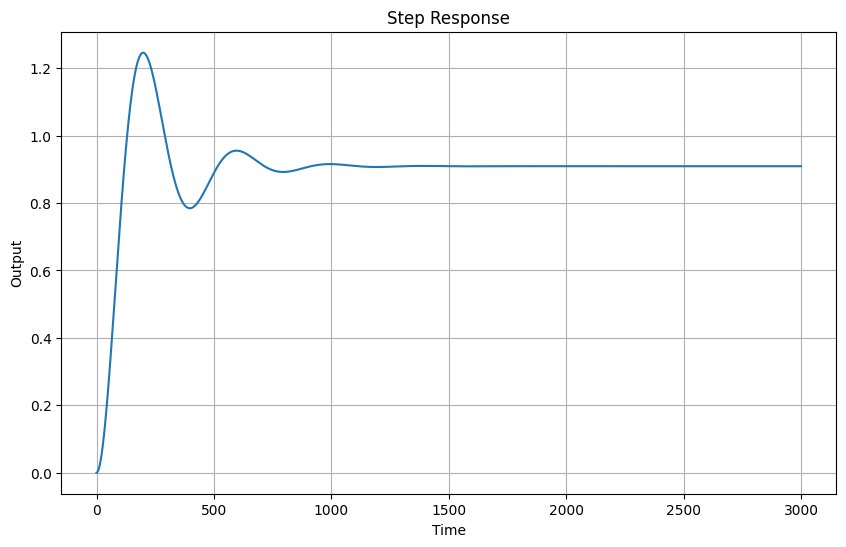

In [ ]:
# Extract the numerator and denominator
num = [0.00025]
den = [1, 0.01, 0.00025 + 2.5e-5]

H = ctrl.TransferFunction(num, den)
t = np.linspace(0, 3000, 10000)
t, y = ctrl.step_response(H, T=t)
y *= 1 # step of amplitude 1

plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.title('Step Response')
plt.xlabel('Time')
plt.ylabel('Output')
plt.grid(True)
plt.show()

### 2.

By means of the time-response plot, find if possible:

- the steady-state value
- the % overshoot of the final value
- the rise time
- the settling time

#### steady-state value


In [ ]:
steady_state = y_linear[-1] + x_eq[1]

print(f"steady_state value: {steady_state}")

steady_state value: 4.99997552781436


In [ ]:
steady_state = y[-1]

print(f"steady_state value: {steady_state}")

steady_state value: 4.999975527813338


#### % overshoot of the final value

In [ ]:
perc_os = 0.

print(f"perc_os: {perc_os}")

perc_os: 0.0


#### rise time

In [ ]:
steady_state = y_linear[-1] + x_eq[1]

# Rise time calculation (10% and 90% criterion)
rise_start = 0.1 * steady_state
rise_end = 0.9 * steady_state
rise_start_index = np.argmax(y_linear + x_eq[1] >= rise_start)
rise_end_index = np.argmax(y_linear + x_eq[1] >= rise_end)
rise_time = t[rise_end_index] - t[rise_start_index]

print(f"Rise time: {rise_time:.3f} seconds")

Rise time: 671.467 seconds


In [ ]:
steady_state = y[-1]

# Rise time calculation (10% and 90% criterion)
rise_start = 0.1 * steady_state
rise_end = 0.9 * steady_state
rise_start_index = np.argmax(y >= rise_start)
rise_end_index = np.argmax(y >= rise_end)
rise_time = t[rise_end_index] - t[rise_start_index]

print(f"Rise time: {rise_time:.3f} seconds")

Rise time: 671.467 seconds


#### settling time

In [ ]:
def find_settling_time_index(y, range_value, steady_state):
    for i in range(len(y) - 1, 0, -1):
        if not (steady_state - range_value <= y[i-1] <= steady_state + range_value):
            return i
    return 0

# Settling time calculation (2% criterion)
two_perc_range = 0.02 * steady_state
settling_time_index = find_settling_time_index(y_linear + x_eq[1], two_perc_range, steady_state)
settling_time = t[settling_time_index]
settling_value = y_linear[settling_time_index] + x_eq[1]

print(f"Settling time: {settling_time:.3f} seconds")
print(f"Value at settling time: {settling_value:.6f}")
print(f"Steady state value: {steady_state:.6f}")

Settling time: 1166.817 seconds
Value at settling time: 4.900014
Steady state value: 4.999976


In [ ]:
def find_settling_time_index(y, range_value, steady_state):
    for i in range(len(y) - 1, 0, -1):
        if not (steady_state - range_value <= y[i-1] <= steady_state + range_value):
            return i
    return 0

# Settling time calculation (2% criterion)
two_perc_range = 0.02 * steady_state
settling_time_index = find_settling_time_index(y, two_perc_range, steady_state)
settling_time = t[settling_time_index]
settling_value = y[settling_time_index]

print(f"Settling time: {settling_time:.3f} seconds")
print(f"Value at settling time: {settling_value:.6f}")
print(f"Steady state value: {steady_state:.6f}")

Settling time: 1166.817 seconds
Value at settling time: 4.900014
Steady state value: 4.999976


### 3.

Identify the poles and zeros of the linearized model (in the open-loop configuration). Plot the pole-zero map. Analyze the stability of the system by studying the map. Discuss the effect of poles and zeros on the process response and the important information you obtain from the map.

Zeros:

Poles:
  -0.00500000000000000

System is stable


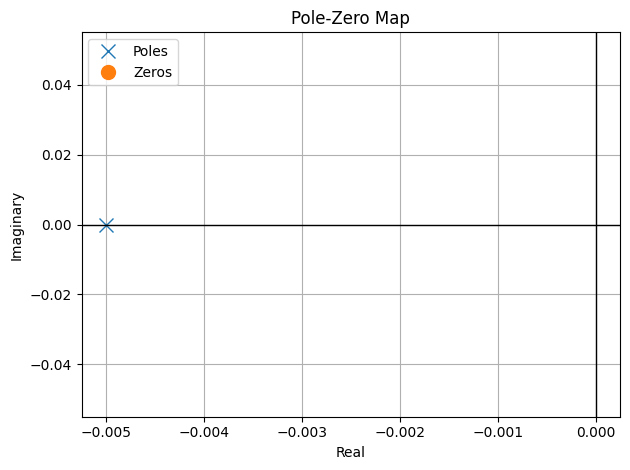

In [ ]:
# Separate numerator and denominator
num, den = H_s[0].as_numer_denom()

# Find zeros (roots of numerator)
zeros = sp.solve(num, s)

# Find poles (roots of denominator)
poles = sp.solve(den, s)

# Print results
print("Zeros:")
for zero in zeros:
    print(f"  {zero}")

print("\nPoles:")
for pole in poles:
    print(f"  {pole}")

# Stability check
stable = all(pole.is_complex and pole.as_real_imag()[0] < 0 for pole in poles)
print(f"\nSystem is {'stable' if stable else 'unstable'}")

# Pole-zero map
plt.plot(np.real(poles), np.imag(poles), 'x', markersize=10, label='Poles')
plt.plot(np.real(zeros), np.imag(zeros), 'o', markersize=10, label='Zeros')
plt.title(f'Pole-Zero Map')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid(True)
plt.legend()
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

plt.tight_layout()
plt.show()

### 4.

Define the possible manipulated (input) and controlled (output) variables and the corresponding properties of controllability and observability of the system

In [ ]:
# A = np.array([[-1/200,  0.], [1/200, -1/200]])
# B = np.array([[1/20, 0.], [0., 1/20]])
# C = np.array([[0., 1.]])

controllability = ctrl.ctrb(A, B)
print("Controllability Matrix:")
print(controllability)

rank_controllability = np.linalg.matrix_rank(controllability)
print(f'\nRank of Controllability Matrix: {rank_controllability}')

observability = ctrl.obsv(A, C)
print("\nObservability Matrix:")
print(observability)

rank_observability = np.linalg.matrix_rank(observability)
print(f'\nRank of Observability Matrix: {rank_observability}')

Controllability Matrix:
[[ 0.05     0.      -0.00025  0.     ]
 [ 0.       0.05     0.00025 -0.00025]]

Rank of Controllability Matrix: 2

Observability Matrix:
[[ 0.     1.   ]
 [ 0.005 -0.005]]

Rank of Observability Matrix: 2
